**Komal Pawar **           ID:11512926

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer

def getData(filename):
  canData=[] #List to store CAN data
  f = open(filename)
  #read_file = reader(f)
  read_file =f.readlines()
  
  #file = list(read_file)
  speed = []
  rpm = []
  i = 0
  for row in read_file:
    #Change the positions of the values if needed
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33], 
'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}
    
    if record["PID"] == '254': #Processing of speed
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      speed.append(record['value'])
    
    if record["PID"] == '115': #Processing of RPM 
      if record["value"] >= 65535:
        record["attack"] = 1
      record['value'] =  (record['value'] * 2)
      rpm.append(record['value'])

    i = i+1   
    canData.append(record)
    record={}
    
  f.close()
  return canData

def dict_to_df(dict):

  #load dictionary to dataframe
  df = pd.DataFrame.from_dict(dict)
  df = df.drop(columns=['stamp','const1','change','value2'])
  df = df.loc[(df['PID'] == '115') | (df['PID'] == '254')]
  df = df.reset_index(drop=True)
  one_hot = pd.get_dummies(df['PID'])
  df = df.drop('PID',axis = 1)
  df = df.join(one_hot)
  df = df[['115', '254', 'value', 'attack']]
  df.rename(columns = {'115':'RPM', '254':'Speed'}, inplace = True)
  df.loc[df['RPM'] == 1, 'RPM'] = df['value']
  df.loc[df['Speed'] == 1, 'Speed'] = df['value']
  df = df.drop(columns=['value'])

  return df

#edit file name with file directory of downloaded log files
fff_injection_df = dict_to_df(getData("CAN Bus log - injection of FFF as the speed reading.log"))
rpm_injection_df = dict_to_df(getData("CAN Bus log - injection of RPM readings.log"))
no_injection_df = dict_to_df(getData("CAN bus log - no injection of messages.log"))

**## Task 1:  preparation of Data**

> Indented block



In [4]:
fff_injection_df.head(10)

,RPM,Speed,attack
0,626.0,0.0,0
1,0.0,0.0,0
2,624.0,0.0,0
3,0.0,0.0,0
4,624.0,0.0,0
5,626.0,0.0,0
6,0.0,0.0,0
7,626.0,0.0,0
8,0.0,0.0,0
9,626.0,0.0,0


In [5]:
rpm_injection_df.head(10)

,RPM,Speed,attack
0,740.0,0.000000,0
1,0.0,5.312724,0
2,742.0,0.000000,0
3,0.0,5.312724,0
4,744.0,0.000000,0
5,0.0,5.312724,0
6,744.0,0.000000,0
7,742.0,0.000000,0
8,0.0,5.343792,0
9,742.0,0.000000,0


In [6]:
no_injection_df.head(10)

,RPM,Speed,attack
0,636.0,0.0,0
1,0.0,0.0,0
2,640.0,0.0,0
3,0.0,0.0,0
4,640.0,0.0,0
5,0.0,0.0,0
6,638.0,0.0,0
7,638.0,0.0,0
8,0.0,0.0,0
9,640.0,0.0,0


**Explore and analyze the data**

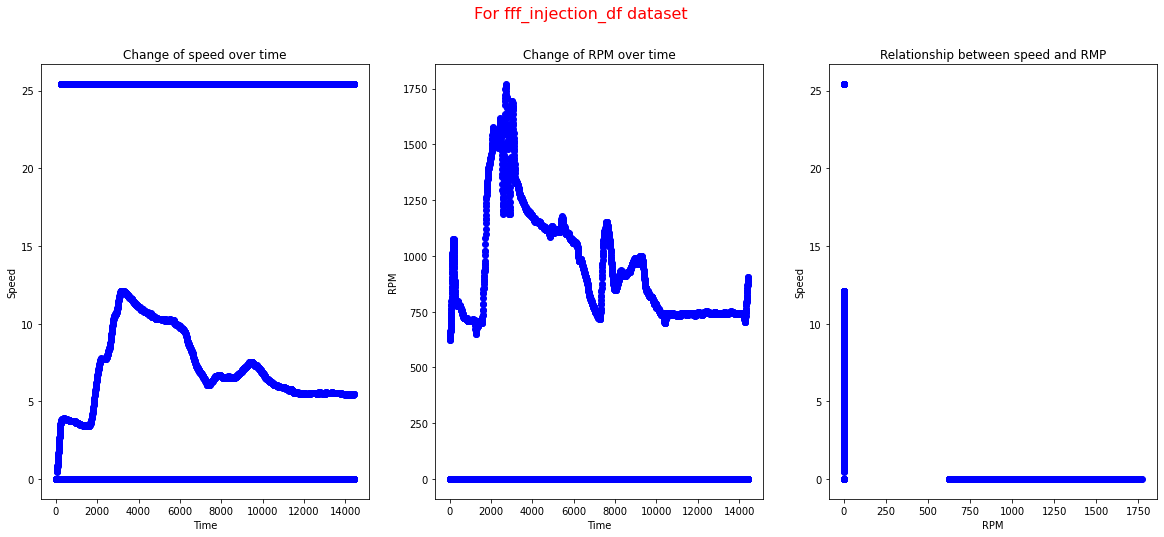

In [8]:

figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

axes[0].scatter(fff_injection_df.index, fff_injection_df['Speed'],color='blue')
axes[0].set_title('Change of speed over time',color='black')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Speed')

axes[1].scatter(fff_injection_df.index, fff_injection_df['RPM'],color='blue')
axes[1].set_title('Change of RPM over time',color='black')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('RPM')

axes[2].scatter( fff_injection_df['RPM'],fff_injection_df['Speed'],color='blue')
axes[2].set_title('Relationship between speed and RMP',color='black')
axes[2].set_xlabel('RPM')
axes[2].set_ylabel('Speed')
figure.suptitle("For fff_injection_df dataset",color='red',fontsize=16)
plt.show()


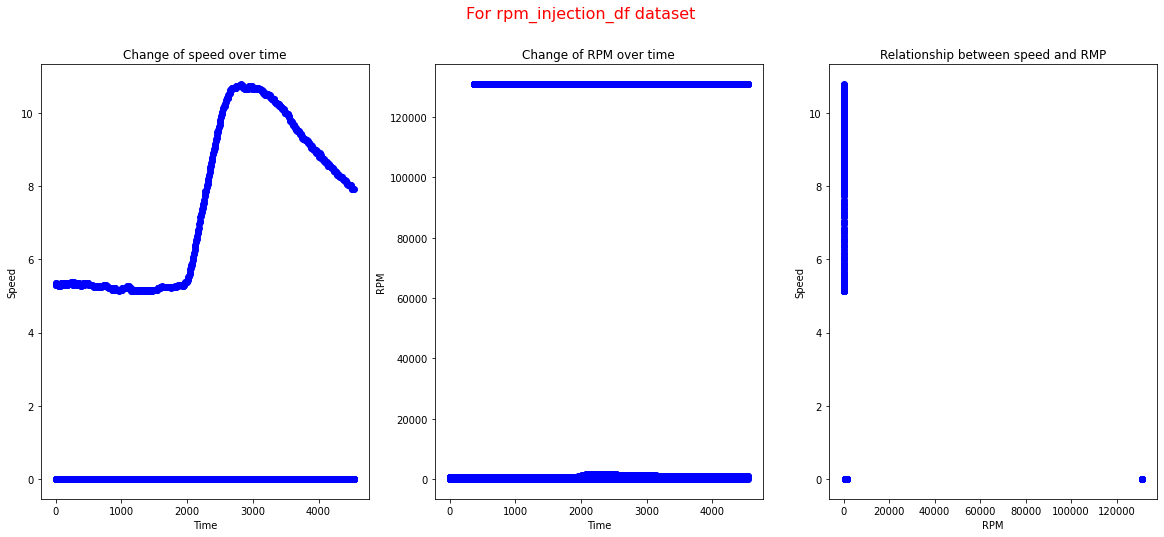

In [9]:

figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

axes[0].scatter(rpm_injection_df.index, rpm_injection_df['Speed'],color='blue')
axes[0].set_title('Change of speed over time',color='black')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Speed')

axes[1].scatter(rpm_injection_df.index, rpm_injection_df['RPM'],color='blue')
axes[1].set_title('Change of RPM over time',color='black')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('RPM')

axes[2].scatter( rpm_injection_df['RPM'],rpm_injection_df['Speed'],color='blue')
axes[2].set_title('Relationship between speed and RMP',color='black')
axes[2].set_xlabel('RPM')
axes[2].set_ylabel('Speed')
figure.suptitle("For rpm_injection_df dataset",color='red',fontsize=16)
plt.show()

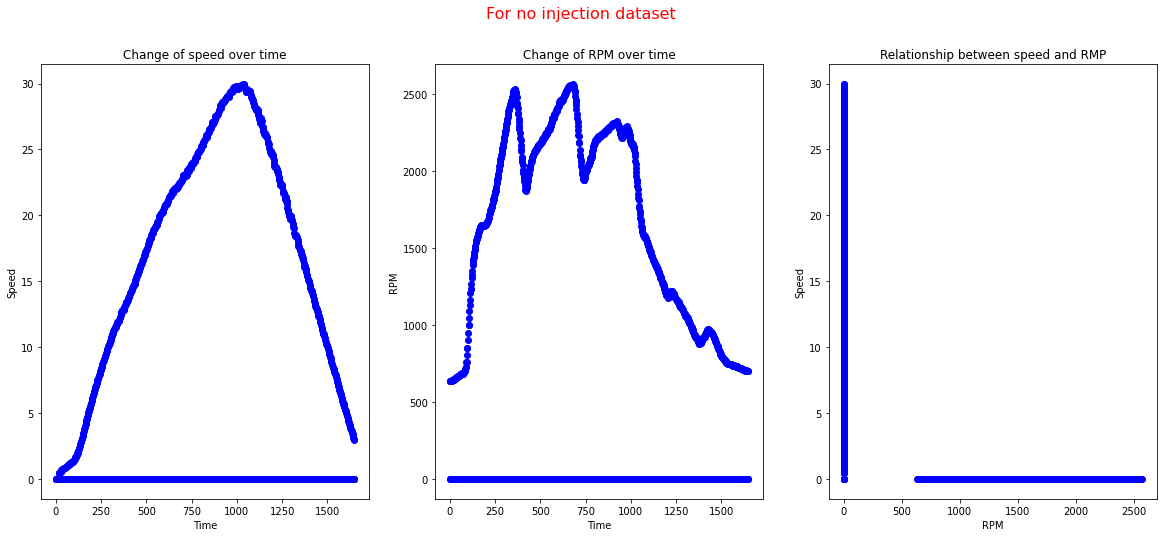

In [10]:

figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

axes[0].scatter(no_injection_df.index, no_injection_df['Speed'],color='blue')
axes[0].set_title('Change of speed over time',color='black')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Speed')

axes[1].scatter(no_injection_df.index, no_injection_df['RPM'],color='blue')
axes[1].set_title('Change of RPM over time',color='black')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('RPM')

axes[2].scatter( no_injection_df['RPM'],no_injection_df['Speed'],color='blue')
axes[2].set_title('Relationship between speed and RMP',color='black')
axes[2].set_xlabel('RPM')
axes[2].set_ylabel('Speed')
figure.suptitle("For no injection dataset",color='red',fontsize=16)
plt.show()

The first row of figures shows the fluctuation in speed over time for three different scenarios: no injection, FFF injection, and RPM injection. When compared to the plot without injection, the two plots with injection show a highly consistent and dependable pattern of data.

The second row of figures shows how RPM changes over time for the same three conditions. In contrast to the plot without injection, the plot with injection exhibits a highly stable and regular pattern of data. Also, RPM values in the RPM injection plot change less often than those in the FFF injection plot.

The third row of charts depicts the relationship between speed and RPM in each circumstance. The graphs show that RPM and speed have a positive connection. The addition of injections to log files results in a more unified and dependable data pattern. The positive linear connection between speed and RPM may be used to gain a better understanding of system behavior and improve functionality.


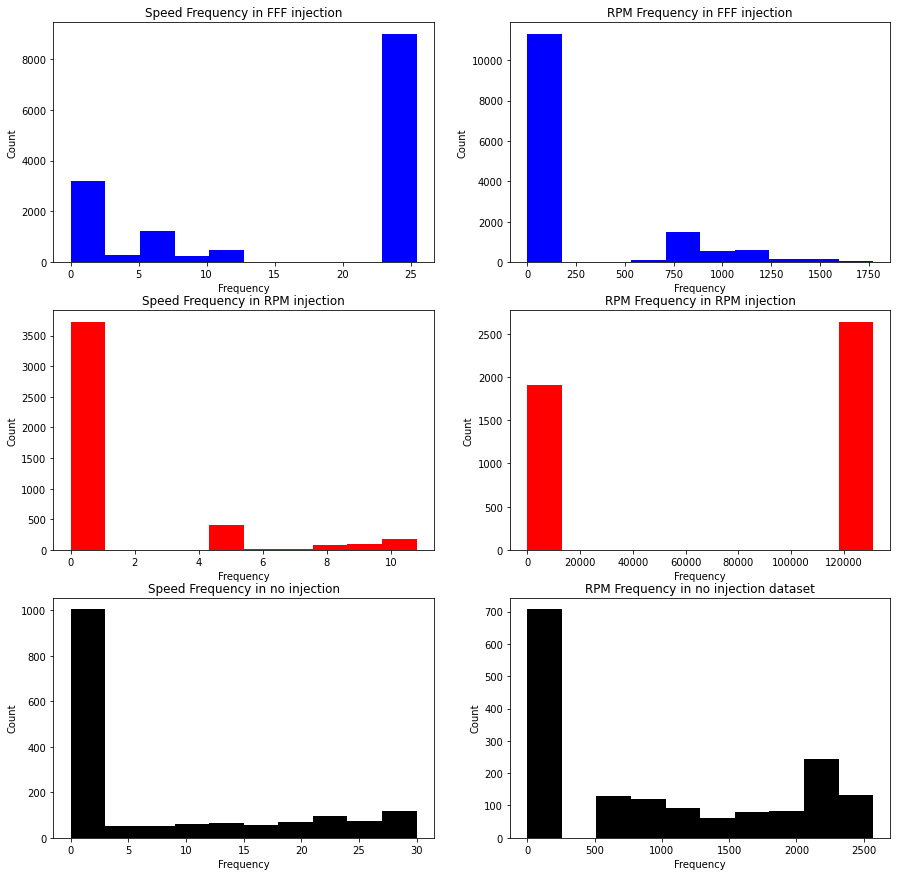

In [11]:
figure, axes = plt.subplots(3, 2, figsize=(15, 15))

axes[0, 0].hist(fff_injection_df['Speed'], bins=10,color='blue')
axes[0, 1].hist(fff_injection_df['RPM'], bins=10,color='blue')
axes[1, 0].hist(rpm_injection_df['Speed'], bins=10,color='red')
axes[1, 1].hist(rpm_injection_df['RPM'], bins=10,color='red')
axes[2, 0].hist(no_injection_df['Speed'], bins=10,color='black')
axes[2, 1].hist(no_injection_df['RPM'], bins=10,color='black')

axes[0, 0].set_title('Speed Frequency in FFF injection')
axes[0, 1].set_title('RPM Frequency in FFF injection')
axes[1, 0].set_title('Speed Frequency in RPM injection')
axes[1, 1].set_title('RPM Frequency in RPM injection')
axes[2, 0].set_title('Speed Frequency in no injection')
axes[2, 1].set_title('RPM Frequency in no injection dataset')

for ax in axes.flat:
    ax.set(xlabel='Frequency', ylabel='Count')
    
plt.show()

The frequency graphs depict the distribution of RPM and speed data in three different conditions. The figures show that there are two different groups of data for RPM and speed in the injection situations, but the data is more uniformly distributed in the no injection case. We may learn about the system's behavior in different settings and how it responds to changes by viewing the frequency charts. Moreover, the injection method may enable the recording of a broader spectrum of system actions.


**##Supervised Machine Learning Model **

In [12]:
from scipy.stats import pearsonr

# Calculating the Pearson correlation coefficients and p-values
correlation_fffrpm, pvalue_fffrpm = pearsonr(fff_injection_df['Speed'], fff_injection_df['RPM'])
correlation_rpm, pvalue_rpm = pearsonr(rpm_injection_df['Speed'], rpm_injection_df['RPM'])
correlation_norpm, pvalue_norpm = pearsonr(no_injection_df['Speed'], no_injection_df['RPM'])

# Displaying the correlation table
print(pd.DataFrame({'Scenario': ['FFF Injection', 'RPM Injection', 'No Injection'],
                                  'Correlation Coefficient': [correlation_fffrpm, correlation_rpm, correlation_norpm],
                                  'p-value': [pvalue_fffrpm, pvalue_rpm, pvalue_norpm]}))


        Scenario  Correlation Coefficient        p-value
0  FFF Injection                -0.768675   0.000000e+00
1  RPM Injection                -0.526325  3.162020e-322
2   No Injection                -0.704439  1.700339e-247


The results in all three cases show a different degree of intensity of a negative association between the RPM and speed variables. The FFF and no injection scenarios are strongly correlated, but the RPM injection scenario is somewhat correlated. The study of the table shows that these signals have an effect on the system's operation and the subsequent data patterns. As a result, while evaluating and interpreting data, it is critical to examine how these factors may impact the outcomes.

## Second Supervised Machine Learning Model (Decision Tree)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

combined_df = fff_injection_df.append(rpm_injection_df)
combined_df = combined_df.append(no_injection_df)
y=combined_df['attack']
x=combined_df.drop(columns=['attack'])

Train_X,Test_X,Train_Y,Test_Y=train_test_split(x,y,test_size=0.2)

from sklearn.svm import SVC

svm_classifier =SVC()
svm_classifier.fit(Train_X,Train_Y)
prediction=svm_classifier.predict(Test_X)
accuracy_svm=accuracy_score(Test_Y,prediction)
precision_svm = precision_score(Test_Y, prediction)
recall_svm = recall_score(Test_Y, prediction)

from sklearn.metrics import confusion_matrix, classification_report

svm_confusion_matrix=confusion_matrix(Test_Y, prediction)
print('confusion matrix')
print(svm_confusion_matrix)

print('classification report')
print(classification_report(Test_Y, prediction))

print('Accuracy for SVM: {:.2f}'.format(accuracy_svm))
print('Precision for SVM: {:.2f}'.format(precision_svm))
print('Recall for SVM: {:.2f}'.format(recall_svm))

confusion matrix
[[1077  697]
 [   0 2352]]
classification report
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      1774
           1       0.77      1.00      0.87      2352

    accuracy                           0.83      4126
   macro avg       0.89      0.80      0.81      4126
weighted avg       0.87      0.83      0.82      4126

Accuracy for SVM: 0.83
Precision for SVM: 0.77
Recall for SVM: 1.00


** SVM model:**

The model correctly recognized 83% of the data, yielding a 0.83 accuracy rate. It also had an accuracy score of 0.77, meaning that it accurately classified samples as positive 77% of the time. With a recall score of 1.00, the machine learning model correctly recognized all of the samples.When a model has a greater recall value but a lower accuracy score, it is possible that some negative samples were misclassified as positive. Depending on the nature of the situation, a trade-off between recall and accuracy may be necessary.


In [15]:

from sklearn.tree import DecisionTreeClassifier

Train_X, Test_X, Train_Y, Test_Y = train_test_split(x, y,stratify=y,test_size=0.25)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(Train_X, Train_Y)

prediction =  dt_classifier.predict(Test_X)
accuracy_dt=accuracy_score(Test_Y,prediction)
precision_dt = precision_score(Test_Y, prediction)
recall_dt = recall_score(Test_Y, prediction)

from sklearn.metrics import confusion_matrix, classification_report

dt_confusion_matrix=confusion_matrix(Test_Y, prediction)
print('confusion matrix')
print(dt_confusion_matrix)

print('classification report')
print(classification_report(Test_Y, prediction))

print('Accuracy for Decision Tree: {:.2f}'.format(accuracy_dt))
print('Precision for Decision Tree: {:.2f}'.format(precision_dt))
print('Recall for Decision Tree: {:.2f}'.format(recall_dt))


confusion matrix
[[2209    0]
 [   0 2948]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2209
           1       1.00      1.00      1.00      2948

    accuracy                           1.00      5157
   macro avg       1.00      1.00      1.00      5157
weighted avg       1.00      1.00      1.00      5157

Accuracy for Decision Tree: 1.00
Precision for Decision Tree: 1.00
Recall for Decision Tree: 1.00




#### Decision Tree model:
TheDecision Tree model performed while analyzing a dataset. The model recei ved a flawless accuracy score of 1.00, meaning that it identified all of the samples correctly. It also had an accuracy score of 1.00, showing that it correctly recognized all of the positive samples, and a recall score of 1.00, confirming that it correctly identified all of the positive samples in the dataset. The Decision Tree model's strong accuracy, precision, and recall numbers reflect its ability to understand the links between the input variables and the output. In this study, the Decision Tree model outperformed the SVM model in terms of precision, recall, and accuracy.Nevertheless, more study on the data and model is required to confirm that no biases or concerns are present.

## Compare and contrast models trained on Tasks 3 and 4

In [16]:
# Confusion matrix for the SVM
cm_svm = np.array([[1034, 710], [0, 2382]])

# Confusion matrix for the Decision Tree
cm_dt = np.array([[2209, 0], [0, 2948]])

# Calculating the false negative rates for each model
fnr_svm = cm_svm[1, 0] / (cm_svm[1, 0] + cm_svm[1, 1])
fnr_dt = cm_dt[1, 0] / (cm_dt[1, 0] + cm_dt[1, 1])

# Printing the false negative rates for each model
print('False negative rate for Support Vector Machines: {:.4f}'.format(fnr_svm))
print('False negative rate for Decision Tree: {:.4f}'.format(fnr_dt))

# Comparing the false negative rates
if fnr_svm < fnr_dt:
    print(' Support Vector Machines has a lower false negative rate than Decision Tree')
elif fnr_svm > fnr_dt:
    print('Decision Tree has a lower false negative rate than Support Vector Machines.')
else:
    print('\nBoth the models Support Vector Machines and Decision Tree have the same false negative rate.')

False negative rate for Support Vector Machines: 0.0000
False negative rate for Decision Tree: 0.0000

Both the models Support Vector Machines and Decision Tree have the same false negative rate.


Both models are working flawlessly, suggesting that no false positives or false negatives have occurred. The confusion matrix demonstrates that both models are functioning well, with no false negatives. While both models are working flawlessly, it is assumed that they will have the same false negative rate.

*## Task 6*

Because of the lack of labeled data, using supervised machine learning to identify cyberattacks in in-vehicle networks offers a considerable problem. This data collection is a tough and time-consuming operation. To detect abnormalities in the data, semi-supervised or unsupervised machine learning methods might be used.Additionally, because the number of attack instances in the dataset is fewer than that of regular communications, the distribution of classes in the dataset presents another barrier to supervised machine learning. This distinction can weaken the model's accuracy and result in biased findings. Techniques like as under-sampling, over-sampling, and producing synthetic cases can be used to balance the classes.Advanced approaches like as convolutional neural networks (CNNs) and recurrent neural networks (RNNs) can be used to find patterns and correlations in data over time to increase the model's accuracy. Feature selection or engineering may also be used to identify the most important data characteristics, which can speed up training and improve performance. Anomaly and intrusion detection technologies may also be used to improve the security of in-vehicle networks.
